In [33]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Fig 1

## Oil Palm

In [2]:
flist = sorted(glob.glob('./results/oilpalm**'))
flist

['./results/oilpalm_our_eval00.pkl',
 './results/oilpalm_simclr_eval00.pkl',
 './results/oilpalm_simclr_eval05.pkl',
 './results/oilpalm_simclr_eval05_old.pkl',
 './results/oilpalm_simclr_eval10.pkl',
 './results/oilpalm_simclr_eval10_old.pkl',
 './results/oilpalm_simclr_transferfromamazon_eval00.pkl',
 './results/oilpalm_transfersvm_eval00.pkl',
 './results/oilpalm_vgg16baseline_eval00.pkl',
 './results/oilpalm_vgg16baseline_eval00_old.pkl',
 './results/oilpalm_vgg16baseline_eval05.pkl',
 './results/oilpalm_vgg16baseline_eval10.pkl',
 './results/oilpalm_vgg16knn_eval00.pkl',
 './results/oilpalm_vgg16logis_eval00.pkl']

In [3]:
baseline_list = sorted(glob.glob('./results/oilpalm_vgg16baseline_eval??.pkl'))
baseline_list

['./results/oilpalm_vgg16baseline_eval00.pkl',
 './results/oilpalm_vgg16baseline_eval05.pkl',
 './results/oilpalm_vgg16baseline_eval10.pkl']

In [4]:
def read_vgg_result(fn):
    print(fn)
    with open(fn, 'rb') as f:
        ds = pickle.load(f)
        x = ds[0]['x_train']
        print(f'\ttrain: {x}, test: {ds[0]["x_test"]}')
        acc = [d['accuracy'] for d in ds[1:]]
        y = np.mean(acc)
        err = np.std(acc)
        print(f'\taccuracy {y:.3f} +/- {err:.3f}')
        return x,y,err

def read_simclr_result(fn):
    print(fn)
    with open(fn, 'rb') as f:
        ds = pickle.load(f)
        x = ds[0]['x_train'][0]
        print(f'\ttrain: {x}, test: {ds[0]["x_test"][0]}')
        y = ds[3]['accuracy']
        print(f'\taccuracy {y:.3f}')
        return x,y

In [5]:
bl = []
for fn in baseline_list:
    x,y,err = read_vgg_result(fn)
    bl.append((x,y,err))
bl = np.array(bl)

./results/oilpalm_vgg16baseline_eval00.pkl
	train: 187, test: 193
	accuracy 0.652 +/- 0.086
./results/oilpalm_vgg16baseline_eval05.pkl
	train: 937, test: 193
	accuracy 0.753 +/- 0.010
./results/oilpalm_vgg16baseline_eval10.pkl
	train: 1688, test: 193
	accuracy 0.754 +/- 0.012


In [6]:
simclr_list = sorted(glob.glob('./results/oilpalm_simclr_eval??.pkl'))
simclr_list

['./results/oilpalm_simclr_eval00.pkl',
 './results/oilpalm_simclr_eval05.pkl',
 './results/oilpalm_simclr_eval10.pkl']

In [7]:
sc = []
for fn in simclr_list:
    x,y = read_simclr_result(fn)
    sc.append((x,y))
sc = np.array(sc)

./results/oilpalm_simclr_eval00.pkl
	train: 187, test: 193
	accuracy 0.741
./results/oilpalm_simclr_eval05.pkl
	train: 937, test: 193
	accuracy 0.788
./results/oilpalm_simclr_eval10.pkl
	train: 1688, test: 193
	accuracy 0.772


In [8]:
our_list = sorted(glob.glob('./results/oilpalm_our_eval??.pkl'))
our_list

['./results/oilpalm_our_eval00.pkl']

In [9]:
x,y,err = read_vgg_result(our_list[0])
x = bl[0][0]
print(x)
our = np.array([(x,y,err)])

./results/oilpalm_our_eval00.pkl
	train: 1661, test: 193
	accuracy 0.749 +/- 0.007
187.0


In [10]:
our

array([[1.87000000e+02, 7.49222798e-01, 7.02832123e-03]])

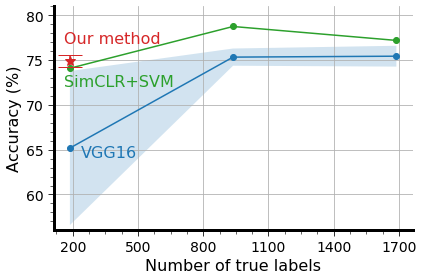

In [11]:
plt.rcParams['axes.linewidth'] = 3
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.fill_between(bl[:,0], bl[:,1]*100-bl[:,2]*100, bl[:,1]*100+bl[:,2]*100, alpha=0.2)
plt.plot(bl[:,0], bl[:,1]*100, 'o-', label='VGG16')
plt.text(bl[0,0]+50, bl[0,1]*100-1, 'VGG16', fontsize=16, color='#1f77b4')

plt.plot(sc[:,0], sc[:,1]*100, 'o-', label='SimCLR + SVM', color='#2ca02c')
plt.text(sc[0,0]-25, sc[0,1]*100-2, 'SimCLR+SVM', fontsize=16, color='#2ca02c')

plt.errorbar(our[:,0], our[:,1]*100, yerr=our[:,2]*100, fmt='*', capsize=12, color='#d62728')
plt.plot(our[:,0], our[:,1]*100, '*-', markersize=11, label='Our method', color='#d62728')
plt.text(our[0,0]-25, our[0,1]*100+2, 'Our method', fontsize=16, color='#d62728')

plt.xlabel('Number of true labels', fontsize=16)
plt.xticks(np.arange(200, 1800, 300), fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.yticks(fontsize=14)
plt.ylim([56, 81])
plt.minorticks_on()
plt.tick_params(which='minor', length=4)
plt.tick_params(which='major', length=6)
# plt.rc('legend',fontsize=14)
# plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('p1.png', dpi=300)

## Amazon

In [12]:
flist = sorted(glob.glob('./results/amazon**.pkl'))
flist

['./results/amazon_our_eval00.pkl',
 './results/amazon_simclr_eval00.pkl',
 './results/amazon_simclr_eval01.pkl',
 './results/amazon_simclr_eval01_old.pkl',
 './results/amazon_simclr_eval05.pkl',
 './results/amazon_simclr_eval05_old.pkl',
 './results/amazon_simclr_eval10.pkl',
 './results/amazon_simclr_eval10_old.pkl',
 './results/amazon_vgg16baseline_eval00.pkl',
 './results/amazon_vgg16baseline_eval01.pkl',
 './results/amazon_vgg16baseline_eval05.pkl',
 './results/amazon_vgg16baseline_eval10.pkl',
 './results/amazon_vgg16knn_eval00.pkl',
 './results/amazon_vgg16logis_eval00.pkl',
 './results/amazon_vgg16svm_eval00.pkl']

In [13]:
baseline_list = sorted(glob.glob('./results/amazon_vgg16baseline_eval??.pkl'))
baseline_list

['./results/amazon_vgg16baseline_eval00.pkl',
 './results/amazon_vgg16baseline_eval01.pkl',
 './results/amazon_vgg16baseline_eval05.pkl',
 './results/amazon_vgg16baseline_eval10.pkl']

In [14]:
bl = []
for fn in baseline_list:
    print(fn)
    with open(fn, 'rb') as f:
        baseline_dict = pickle.load(f)
        x = baseline_dict[0]['x_train']
        print(f'\ttrain: {x}, test: {baseline_dict[0]["x_test"]}')
        acc = [d['accuracy'] for d in baseline_dict[1:]]
        y = np.mean(acc)
        err = np.std(acc)
        print(f'\taccuracy {y:.3f} +/- {err:.3f}')
        bl.append((x,y,err))
bl = np.array(bl)

./results/amazon_vgg16baseline_eval00.pkl
	train: 1055, test: 1056
	accuracy 0.846 +/- 0.006
./results/amazon_vgg16baseline_eval01.pkl
	train: 2955, test: 1056
	accuracy 0.879 +/- 0.004
./results/amazon_vgg16baseline_eval05.pkl
	train: 10558, test: 1056
	accuracy 0.891 +/- 0.004
./results/amazon_vgg16baseline_eval10.pkl
	train: 20062, test: 1056
	accuracy 0.899 +/- 0.006


In [15]:
simclr_list = sorted(glob.glob('./results/amazon_simclr_eval??.pkl'))
simclr_list

['./results/amazon_simclr_eval00.pkl',
 './results/amazon_simclr_eval01.pkl',
 './results/amazon_simclr_eval05.pkl',
 './results/amazon_simclr_eval10.pkl']

In [16]:
sc = []
for fn in simclr_list:
    print(fn)
    with open(fn, 'rb') as f:
        simclr_dict = pickle.load(f)
        x = simclr_dict[0]['x_train'][0]
        print(f'\ttrain: {x}, test: {simclr_dict[0]["x_test"][0]}')
        y = simclr_dict[3]['accuracy']
        print(f'\taccuracy {y:.3f}')
        sc.append((x,y))
sc = np.array(sc)

./results/amazon_simclr_eval00.pkl
	train: 1055, test: 1056
	accuracy 0.844
./results/amazon_simclr_eval01.pkl
	train: 2955, test: 1056
	accuracy 0.858
./results/amazon_simclr_eval05.pkl
	train: 10558, test: 1056
	accuracy 0.859
./results/amazon_simclr_eval10.pkl
	train: 20062, test: 1056
	accuracy 0.865


In [17]:
our_list = sorted(glob.glob('./results/amazon_our_eval??.pkl'))
our_list

['./results/amazon_our_eval00.pkl']

In [18]:
our = []
print(our_list[0])
with open(our_list[0], 'rb') as f:
    our_dict = pickle.load(f)
    x = bl[0][0]
    print(f'\ttrain: {x}, test: {our_dict[0]["x_test"]}')
    acc = [d['accuracy'] for d in our_dict[1:]]
    y = np.mean(acc)
    err = np.std(acc)
    print(f'\taccuracy {y:.3f} +/- {err:.3f}')
    our.append((x,y,err))
our = np.array(our)

./results/amazon_our_eval00.pkl
	train: 1055.0, test: 1056
	accuracy 0.859 +/- 0.001


In [19]:
our

array([[1.05500000e+03, 8.58901515e-01, 1.19783245e-03]])

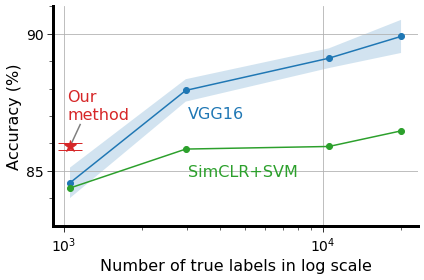

In [20]:
fig, ax = plt.subplots()
plt.rcParams['axes.linewidth'] = 3
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.fill_between(bl[:,0], bl[:,1]*100-bl[:,2]*100, bl[:,1]*100+bl[:,2]*100, alpha=0.2)
plt.plot(bl[:,0], bl[:,1]*100, 'o-', label='VGG16')
plt.text(bl[1,0]+50, bl[1,1]*100-1, 'VGG16', fontsize=16, color='#1f77b4')

plt.plot(sc[:,0], sc[:,1]*100, 'o-', label='SimCLR + SVM', color='#2ca02c')
plt.text(sc[1,0]+50, sc[1,1]*100-1, 'SimCLR+SVM', fontsize=16, color='#2ca02c')

plt.plot([our[:,0], our[:,0]+100], [our[:,1]*100, our[:,1]*100+0.8], color='#7f7f7f')
plt.errorbar(our[:,0], our[:,1]*100, yerr=our[:,2]*100, fmt='*', capsize=12, color='#d62728')
plt.plot(our[:,0], our[:,1]*100, '*-', markersize=12, label='Our method', color='#d62728')
plt.text(our[0,0]-25, our[0,1]*100+1, 'Our\nmethod', fontsize=16, color='#d62728')

plt.xlabel('Number of true labels in log scale', fontsize=16)
# plt.xticks(np.arange(1000, 22000, 5000), fontsize=14)
plt.xticks(fontsize=14)
plt.xscale('log')
plt.ylabel('Accuracy (%)', fontsize=16)
plt.yticks(np.arange(80, 92, 5),fontsize=14)
plt.ylim([83, 91])
plt.minorticks_on()
plt.tick_params(which='minor', length=4)
plt.tick_params(which='major', length=6)
# plt.rc('legend',fontsize=14)
# plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('p2.png', dpi=300)

# Table 1

In [21]:
def get_report_cnn(fn, tag):
    print(fn)
    with open(fn, 'rb') as f:
        ds = pickle.load(f)
        x = ds[0]['x_train']
        acc = np.array([d['accuracy'] for d in ds[1:]])*100
        p = [d[tag]['precision'] for d in ds[1:]]
        r = [d[tag]['recall'] for d in ds[1:]]
        f1 = [d[tag]['f1-score'] for d in ds[1:]]
        return x, acc, p, r, f1

def get_report_simclr(fn, tag, ind=3):
    m = {2:'logistic regression', 3:'svm', 4:'knn'}
    print(fn, m[ind])
    with open(fn, 'rb') as f:
        ds = pickle.load(f)
        x = ds[0]['x_train'][0]
        acc = ds[ind]['accuracy']*100
        p = ds[ind][tag]['precision']
        r = ds[ind][tag]['recall']
        f1 = ds[ind][tag]['f1-score']
        return x, acc, p, r, f1


In [22]:
baseline_list = sorted(glob.glob('./results/oilpalm_vgg16baseline_eval??.pkl'))
x, acc, p, r, f1 = get_report_cnn(baseline_list[0], 'palm')
print(x)
print(f'\taccuracy {np.mean(acc):.1f} +/- {np.std(acc):.1f}')
print(f'\tprecision {np.mean(p):.3f} +/- {np.std(p):.3f}')
print(f'\trecall {np.mean(r):.3f} +/- {np.std(r):.3f}')
print(f'\tf1-score {np.mean(f1):.3f} +/- {np.std(f1):.3f}')

simclr_list = sorted(glob.glob('./results/oilpalm_simclr_eval??.pkl'))
x, acc, p, r, f1 = get_report_simclr(simclr_list[0], 'palm')
print(f'\taccuracy {np.mean(acc):.1f}')
print(f'\tprecision {np.mean(p):.3f}')
print(f'\trecall {np.mean(r):.3f}')
print(f'\tf1-score {np.mean(f1):.3f}')


our_list = sorted(glob.glob('./results/oilpalm_our_eval??.pkl'))
x, acc, p, r, f1 = get_report_cnn(our_list[0], 'palm')
print(f'\taccuracy {np.mean(acc):.1f} +/- {np.std(acc):.1f}')
print(f'\tprecision {np.mean(p):.3f} +/- {np.std(p):.3f}')
print(f'\trecall {np.mean(r):.3f} +/- {np.std(r):.3f}')
print(f'\tf1-score {np.mean(f1):.3f} +/- {np.std(f1):.3f}')

./results/oilpalm_vgg16baseline_eval00.pkl
187
	accuracy 65.2 +/- 8.6
	precision 0.708 +/- 0.132
	recall 0.647 +/- 0.203
	f1-score 0.636 +/- 0.049
./results/oilpalm_simclr_eval00.pkl svm
	accuracy 74.1
	precision 0.772
	recall 0.656
	f1-score 0.709
./results/oilpalm_our_eval00.pkl
	accuracy 74.9 +/- 0.7
	precision 0.798 +/- 0.012
	recall 0.643 +/- 0.011
	f1-score 0.712 +/- 0.008


In [23]:
baseline_list = sorted(glob.glob('./results/amazon_vgg16baseline_eval??.pkl'))
x, acc, p, r, f1 = get_report_cnn(baseline_list[0], 'agri')
print(x)
print(f'\taccuracy {np.mean(acc):.1f} +/- {np.std(acc):.1f}')
print(f'\tprecision {np.mean(p):.3f} +/- {np.std(p):.3f}')
print(f'\trecall {np.mean(r):.3f} +/- {np.std(r):.3f}')
print(f'\tf1-score {np.mean(f1):.3f} +/- {np.std(f1):.3f}')

simclr_list = sorted(glob.glob('./results/amazon_simclr_eval??.pkl'))
x, acc, p, r, f1 = get_report_simclr(simclr_list[0], 'agri')
print(f'\taccuracy {np.mean(acc):.1f}')
print(f'\tprecision {np.mean(p):.3f}')
print(f'\trecall {np.mean(r):.3f}')
print(f'\tf1-score {np.mean(f1):.3f}')


our_list = sorted(glob.glob('./results/amazon_our_eval??.pkl'))
x, acc, p, r, f1 = get_report_cnn(our_list[0], 'agri')
print(f'\taccuracy {np.mean(acc):.1f} +/- {np.std(acc):.1f}')
print(f'\tprecision {np.mean(p):.3f} +/- {np.std(p):.3f}')
print(f'\trecall {np.mean(r):.3f} +/- {np.std(r):.3f}')
print(f'\tf1-score {np.mean(f1):.3f} +/- {np.std(f1):.3f}')

./results/amazon_vgg16baseline_eval00.pkl
1055
	accuracy 84.6 +/- 0.6
	precision 0.851 +/- 0.009
	recall 0.862 +/- 0.006
	f1-score 0.856 +/- 0.005
./results/amazon_simclr_eval00.pkl svm
	accuracy 84.4
	precision 0.819
	recall 0.854
	f1-score 0.836
./results/amazon_our_eval00.pkl
	accuracy 85.9 +/- 0.1
	precision 0.897 +/- 0.004
	recall 0.831 +/- 0.004
	f1-score 0.863 +/- 0.001


# Part 2

In [24]:
flist = sorted(glob.glob('./results/oilpalm**'))
flist

['./results/oilpalm_our_eval00.pkl',
 './results/oilpalm_simclr_eval00.pkl',
 './results/oilpalm_simclr_eval05.pkl',
 './results/oilpalm_simclr_eval05_old.pkl',
 './results/oilpalm_simclr_eval10.pkl',
 './results/oilpalm_simclr_eval10_old.pkl',
 './results/oilpalm_simclr_transferfromamazon_eval00.pkl',
 './results/oilpalm_transfersvm_eval00.pkl',
 './results/oilpalm_vgg16baseline_eval00.pkl',
 './results/oilpalm_vgg16baseline_eval00_old.pkl',
 './results/oilpalm_vgg16baseline_eval05.pkl',
 './results/oilpalm_vgg16baseline_eval10.pkl',
 './results/oilpalm_vgg16knn_eval00.pkl',
 './results/oilpalm_vgg16logis_eval00.pkl']

In [25]:
simclr_list = sorted(glob.glob('./results/oilpalm_simclr_eval??.pkl'))
for ind in range(2,5):
    x, acc, p, r, f1 = get_report_simclr(simclr_list[0], 'palm', ind)
    print(x)
    print(f'\taccuracy {np.mean(acc):.1f}')
    print(f'\tprecision {np.mean(p):.3f}')
    print(f'\trecall {np.mean(r):.3f}')
    print(f'\tf1-score {np.mean(f1):.3f}')

./results/oilpalm_simclr_eval00.pkl logistic regression
187
	accuracy 57.5
	precision 0.565
	recall 0.516
	f1-score 0.539
./results/oilpalm_simclr_eval00.pkl svm
187
	accuracy 74.1
	precision 0.772
	recall 0.656
	f1-score 0.709
./results/oilpalm_simclr_eval00.pkl knn
187
	accuracy 70.5
	precision 0.737
	recall 0.602
	f1-score 0.663


In [26]:
simclr_list_predict = ['./results/oilpalm_vgg16logis_eval00.pkl',
                       './results/oilpalm_our_eval00.pkl',
                       './results/oilpalm_vgg16knn_eval00.pkl']
for i, f in enumerate(simclr_list_predict):
    x, acc, p, r, f1 = get_report_cnn(f, 'palm')
    print(x)
    print(f'\taccuracy {np.mean(acc):.1f} +/- {np.std(acc):.1f}')
    print(f'\tprecision {np.mean(p):.3f} +/- {np.std(p):.3f}')
    print(f'\trecall {np.mean(r):.3f} +/- {np.std(r):.3f}')
    print(f'\tf1-score {np.mean(f1):.3f} +/- {np.std(f1):.3f}')

./results/oilpalm_vgg16logis_eval00.pkl
1659
	accuracy 71.2 +/- 2.0
	precision 0.771 +/- 0.048
	recall 0.576 +/- 0.020
	f1-score 0.659 +/- 0.017
./results/oilpalm_our_eval00.pkl
1661
	accuracy 74.9 +/- 0.7
	precision 0.798 +/- 0.012
	recall 0.643 +/- 0.011
	f1-score 0.712 +/- 0.008
./results/oilpalm_vgg16knn_eval00.pkl
1663
	accuracy 76.2 +/- 0.9
	precision 0.881 +/- 0.020
	recall 0.585 +/- 0.023
	f1-score 0.703 +/- 0.015


In [27]:
simclr_list = sorted(glob.glob('./results/amazon_simclr_eval??.pkl'))
for ind in range(2,5):
    x, acc, p, r, f1 = get_report_simclr(simclr_list[0], 'agri', ind)
    print(x)
    print(f'\taccuracy {np.mean(acc):.1f}')
    print(f'\tprecision {np.mean(p):.3f}')
    print(f'\trecall {np.mean(r):.3f}')
    print(f'\tf1-score {np.mean(f1):.3f}')

./results/amazon_simclr_eval00.pkl logistic regression
1055
	accuracy 79.2
	precision 0.779
	recall 0.773
	f1-score 0.776
./results/amazon_simclr_eval00.pkl svm
1055
	accuracy 84.4
	precision 0.819
	recall 0.854
	f1-score 0.836
./results/amazon_simclr_eval00.pkl knn
1055
	accuracy 83.0
	precision 0.805
	recall 0.840
	f1-score 0.822


In [28]:
simclr_list_predict = ['./results/amazon_vgg16logis_eval00.pkl',
                       './results/amazon_vgg16svm_eval00.pkl',
                       './results/amazon_vgg16knn_eval00.pkl']
for i, f in enumerate(simclr_list_predict):
    x, acc, p, r, f1 = get_report_cnn(f, 'agri')
    print(x)
    print(f'\taccuracy {np.mean(acc):.1f} +/- {np.std(acc):.1f}')
    print(f'\tprecision {np.mean(p):.3f} +/- {np.std(p):.3f}')
    print(f'\trecall {np.mean(r):.3f} +/- {np.std(r):.3f}')
    print(f'\tf1-score {np.mean(f1):.3f} +/- {np.std(f1):.3f}')

./results/amazon_vgg16logis_eval00.pkl
2955
	accuracy 83.7 +/- 0.5
	precision 0.836 +/- 0.006
	recall 0.863 +/- 0.011
	f1-score 0.849 +/- 0.005
./results/amazon_vgg16svm_eval00.pkl
2955
	accuracy 85.2 +/- 0.2
	precision 0.869 +/- 0.002
	recall 0.849 +/- 0.002
	f1-score 0.859 +/- 0.002
./results/amazon_vgg16knn_eval00.pkl
2955
	accuracy 84.9 +/- 0.5
	precision 0.865 +/- 0.006
	recall 0.849 +/- 0.005
	f1-score 0.857 +/- 0.004


# Part 4

In [29]:
flist = sorted(glob.glob('./results/oilpalm**'))
flist

['./results/oilpalm_our_eval00.pkl',
 './results/oilpalm_simclr_eval00.pkl',
 './results/oilpalm_simclr_eval05.pkl',
 './results/oilpalm_simclr_eval05_old.pkl',
 './results/oilpalm_simclr_eval10.pkl',
 './results/oilpalm_simclr_eval10_old.pkl',
 './results/oilpalm_simclr_transferfromamazon_eval00.pkl',
 './results/oilpalm_transfersvm_eval00.pkl',
 './results/oilpalm_vgg16baseline_eval00.pkl',
 './results/oilpalm_vgg16baseline_eval00_old.pkl',
 './results/oilpalm_vgg16baseline_eval05.pkl',
 './results/oilpalm_vgg16baseline_eval10.pkl',
 './results/oilpalm_vgg16knn_eval00.pkl',
 './results/oilpalm_vgg16logis_eval00.pkl']

In [30]:
simclr_list = sorted(glob.glob('./results/oilpalm_simclr_eval00.pkl'))
x, acc, p, r, f1 = get_report_simclr(simclr_list[0], 'palm')
print(x)
print(f'\taccuracy {np.mean(acc):.1f}')
print(f'\tprecision {np.mean(p):.3f}')
print(f'\trecall {np.mean(r):.3f}')
print(f'\tf1-score {np.mean(f1):.3f}')

./results/oilpalm_simclr_eval00.pkl svm
187
	accuracy 74.1
	precision 0.772
	recall 0.656
	f1-score 0.709


In [31]:
simclr_list = sorted(glob.glob('./results/oilpalm_simclr_transferfromamazon_eval00.pkl'))
x, acc, p, r, f1 = get_report_simclr(simclr_list[0], 'palm')
print(x)
print(f'\taccuracy {np.mean(acc):.1f}')
print(f'\tprecision {np.mean(p):.3f}')
print(f'\trecall {np.mean(r):.3f}')
print(f'\tf1-score {np.mean(f1):.3f}')

./results/oilpalm_simclr_transferfromamazon_eval00.pkl svm
187
	accuracy 72.5
	precision 0.692
	recall 0.774
	f1-score 0.731


In [32]:
simclr_list_predict = ['./results/oilpalm_transfersvm_eval00.pkl']
for i, f in enumerate(simclr_list_predict):
    x, acc, p, r, f1 = get_report_cnn(f, 'palm')
    print(x)
    print(f'\taccuracy {np.mean(acc):.1f} +/- {np.std(acc):.1f}')
    print(f'\tprecision {np.mean(p):.3f} +/- {np.std(p):.3f}')
    print(f'\trecall {np.mean(r):.3f} +/- {np.std(r):.3f}')
    print(f'\tf1-score {np.mean(f1):.3f} +/- {np.std(f1):.3f}')

./results/oilpalm_transfersvm_eval00.pkl
1662
	accuracy 73.2 +/- 0.7
	precision 0.716 +/- 0.009
	recall 0.733 +/- 0.004
	f1-score 0.725 +/- 0.006


# Part 3 tSNE